# Reto

- Análisis de Ciencias de Datos
- Profesores:
  - Rubí Isela Gutiérrez López
  - Daniel Otero Fadul
- Equipo 4

| Nombre | Matrícula |
| ---- | ---- |
| Juan Pablo Echeagaray González | A00830646 |

Fecha: Por definir


## Meta de investigación

- Predecir el comportamiento de las ventas en un mundo post-pandémico

In [23]:
# Dependencias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


## Lectura de datos

In [24]:
df = pd.read_csv('datos-reto.csv')
# La primera columna es un índice, no se necesita mantener
df.drop(df.columns[[0]], axis=1, inplace=True)

## Limpieza de datos

In [25]:
df.head()

,Country,Consultant,Opportunity ID,Account,ISBN 13,Author,Title,Probability,% de Avance,Term,...,Adjusted Revenue,Technology,Course Name,Edition,Course ID,# of Courses,Customer,Client,Unlimited Flag,Implementation Id
0,Mexico,14,5255970,COLEGIO DE BACHILLERES DE CHIHUAHUA,9.786075e+12,Martinez,Literatura II,No_Aceptada,0,Aug-21,...,0,NaN,LITERATURA COBACH,1.0,1847125,NaN,Potential Customer,3705,NaN,NaN
1,Mexico,10,5172372,U-ERRE UNIVERSIDAD REGIOMONTANA,9.781338e+12,Serway/Vuille,INTL IAC WA FUNDAMENTOS DE FIS ICA,Closed Sale,1,Jan-21,...,0,WebAssign,FISICA 1 PREPA U-ERRE,11.0,1905363,NaN,Potential Customer,3681,NaN,NaN
2,Mexico,6,4496314,ITESM CAMPUS MONTERREY,9.786075e+12,CENGAGE,BIBLIOTECA DIGITAL MAGELLAN,No_Aceptada,0,Sep-20,...,0,NaN,BIBLIOTECA DIGITAL,1.0,1873177,NaN,Potential Customer,5929,NaN,NaN
3,Mexico,0,5745690,UNITEC CAMPUS CUITLAHUAC,9.786076e+12,GALINDO,MODELOS DE ORGANIZACIÓN,Evaluation Visit,0.75,May-22,...,0,NaN,Estructuras organizacionales y gestión del con...,1.0,1934416,NaN,Potential Customer,2538,NaN,NaN
4,Mexico,0,5745686,UNITEC CAMPUS CUITLAHUAC,9.786076e+12,GALINDO,MODELOS DE ORGANIZACIÓN,Evaluation Visit,0.75,Jan-22,...,0,NaN,Estructuras organizacionales y gestión del con...,1.0,1934416,NaN,Potential Customer,2538,NaN,NaN


In [26]:
df.columns

Index(['Country', 'Consultant', 'Opportunity ID', 'Account', 'ISBN 13',
       'Author', 'Title', 'Probability', '% de Avance ', 'Term',
       'New Course Takeaway Units', 'Seats', 'Units', 'Revenue',
       'Adjusted Revenue', 'Technology', 'Course Name', 'Edition', 'Course ID',
       '# of Courses', 'Customer', 'Client', 'Unlimited Flag',
       'Implementation Id'],
      dtype='object')

In [27]:
df.dtypes

Country                       object
Consultant                     int64
Opportunity ID                 int64
Account                       object
ISBN 13                      float64
Author                        object
Title                         object
Probability                   object
% de Avance                   object
Term                          object
New Course Takeaway Units    float64
Seats                          int64
Units                          int64
Revenue                      float64
Adjusted Revenue               int64
Technology                    object
Course Name                   object
Edition                      float64
Course ID                      int64
# of Courses                 float64
Customer                      object
Client                         int64
Unlimited Flag               float64
Implementation Id            float64
dtype: object

In [28]:
df.Consultant.describe()

count    24862.000000
mean         7.596895
std          4.709142
min          0.000000
25%          3.000000
50%          8.000000
75%         11.000000
max         14.000000
Name: Consultant, dtype: float64

### Remover columnas con valores NaN

In [29]:
tresh = 0.7
nan_props = []
for col in df.columns:
    nan_props.append(df[col].isnull().sum() / len(df))
    

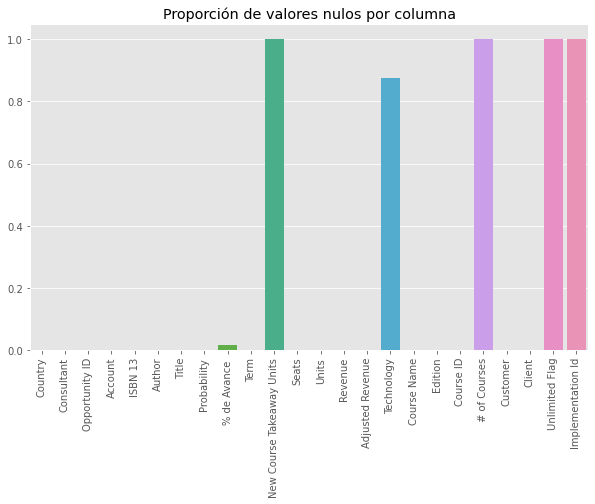

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df.columns, y=nan_props)
ax.set_title('Proporción de valores nulos por columna')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


In [32]:
# Remover todas las columnas con un porcentaje de nulos mayor al treshold
df.dropna(axis=1, thresh=tresh * df.shape[0], inplace=True)
